In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

path = "/Users/Kellie/Documents/data301/proj/datasets/processed/201901_short.csv"
ks201901 = pd.read_csv(path).set_index("id")
ks201901.head(3)

backers_count                                              blurb  \
id                                                                             
1706810769             17  I am creating a series of unique collectibles ...   
36375621                6  Converting sports jargon into creative design ...   
497820494               0  Rollover “Prime Air”, "Agile Drone" is here. U...   

           country  created_at currency    deadline     goal  launched_at  \
id                                                                          
1706810769      GB  1530101728      GBP  1535484209  13228.0   1530300209   
36375621        US  1527875101      USD  1535781931   1000.0   1533189931   
497820494       US  1444842346      USD  1448931600   2999.0   1445892149   

                                                         name  pledged  \
id                                                                       
1706810769   Wing It - A Nature Loving Collectible Art Series    585.0   
36375621          Crow Hop Sports - Sports Apparel Reimagined    196.0   
497820494   World's First Radio Controlled Cargo Lifter fo...      0.0   

              ...     usd_pledged  parent_category      category  \
id            ...                                                  
1706810769    ...      767.161805              art  illustration   
36375621      ...      196.000000          fashion       apparel   
497820494     ...        0.000000       technology        flight   

               created_at_clean  state_changed_at_clean    launched_at_clean  \
id                                                                             
1706810769  2018-06-27 12:15:28     2018-08-28 19:23:31  2018-06-29 19:23:29   
36375621    2018-06-01 17:45:01     2018-09-01 06:05:32  2018-08-02 06:05:31   
497820494   2015-10-14 17:05:46     2015-12-01 01:00:00  2015-10-26 20:42:29   

                 deadline_clean project_duration time_til_state_changed  \
id                                                                        
1706810769  2018-08-28 19:23:29          5382481                5382483   
36375621    2018-09-01 06:05:31          7906830                7906831   
497820494   2015-12-01 01:00:00          4089254                4089254   

           avg_pledge  
id                     
1706810769  45.127165  
36375621    32.666667  
497820494    0.000000  

[3 rows x 26 columns]

In [3]:
iris = data.iris()
chart = alt.Chart(iris).mark_point().encode(
    x="petalLength",
    y="petalWidth",
    color="species"
)
chart

In [5]:
alt.Chart(data.iris()).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [4]:
ks201901.shape

(7612, 26)

In [9]:
sample = ks201901.sample(n=5000)
sample.head(3)

backers_count                                              blurb  \
id                                                                             
410866882             620  ÖRing Plus is a wearable device with custom vi...   
566231437             796  A new LGBTQ+ webseries about dates, mates, and...   
1132296290            108  Empowering Latin American women in technology ...   

           country  created_at currency    deadline     goal  launched_at  \
id                                                                          
410866882       US  1522973501      USD  1530203222  30000.0   1527611222   
566231437       CA  1434905614      CAD  1438088878  15000.0   1435496878   
1132296290      US  1421704535      USD  1433188740  10000.0   1432055697   

                                           name  pledged    ...      \
id                                                          ...       
410866882   ÖRing Plus | Sexual Health Wearable  59062.0    ...       
566231437                            Couple-ish  29967.0    ...       
1132296290            Chicas Poderosas Stanford  10677.0    ...       

             usd_pledged  parent_category   category     created_at_clean  \
id                                                                          
410866882   59062.000000       technology  wearables  2018-04-06 00:11:41   
566231437   24313.916939     film & video  webseries  2015-06-21 16:53:34   
1132296290  10677.000000       journalism        web  2015-01-19 21:55:35   

            state_changed_at_clean    launched_at_clean       deadline_clean  \
id                                                                             
410866882      2018-06-28 16:27:02  2018-05-29 16:27:02  2018-06-28 16:27:02   
566231437      2015-07-28 13:07:59  2015-06-28 13:07:58  2015-07-28 13:07:58   
1132296290     2015-06-01 19:59:00  2015-05-19 17:14:57  2015-06-01 19:59:00   

           project_duration time_til_state_changed avg_pledge  
id                                                             
410866882           7229721                7229721  95.261290  
566231437           3183264                3183265  30.545122  
1132296290         11484205               11484205  98.861111  

[3 rows x 26 columns]

In [12]:
alt.Chart(sample).mark_point().encode(
    x="goal", y="avg_pledge"
)

In [17]:
test_df = pd.DataFrame([[0, "a"], [1, "b"]],
                       columns=["col1", "col2"]
                      )
alt.Chart(test_df).mark_point().encode(
    x="col1", y="col2"
)

In [13]:
test = pd.Series(data=[1,2,3,4], index=[1,2,3,4])
alt.Chart(test).mark_point().encode(
    x="goal", y="avg_pledge"
)

1    1
2    2
3    3
4    4
dtype: int64

In [11]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

train_df = ks201901.loc[(ks201901.state == "successful") |
                        (ks201901.state == "failed")]
train_df.loc[:, "state_numeric"] = train_df.state.map({
    "failed": 0,
    "successful": 1
})

x_train = train_df[["backers_count", "goal", "usd_pledged", "avg_pledge"]]
y_train = train_df["state"]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


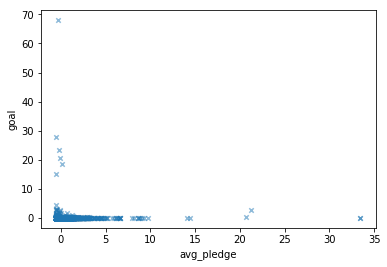

In [27]:
# TODO: fix standardization

quant_cols = ["backers_count", "goal", "usd_pledged", "avg_pledge"]
scaler = StandardScaler()
train_std_arr = scaler.fit_transform(train_df[quant_cols])
train_std = pd.DataFrame(data=train_std_arr, columns=quant_cols)
train_std.plot.scatter(x="avg_pledge", y="goal", marker="x", alpha=0.5)

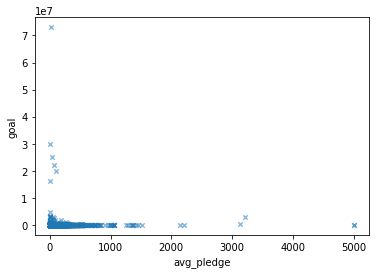

In [28]:
train_df.plot.scatter(x="avg_pledge", y="goal", marker="x", alpha=0.5)

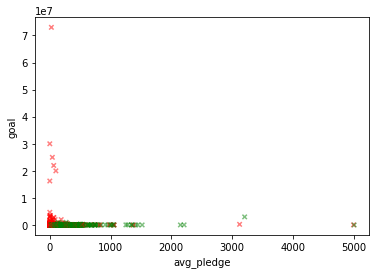

In [53]:
colors = train_df["state"].map({
    "failed": "r",
    "successful": "g"
})
train_df.plot.scatter(x="avg_pledge", y="goal", c=colors, marker="x", alpha=0.5)

In [77]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler

scaler = MaxAbsScaler()

test_cols = ["avg_pledge", "goal"]
test_train_df = train_df[test_cols]
test_train_scl = pd.DataFrame(
    data=scaler.fit_transform(test_train_df),
    columns=test_cols)
test_train_scl = pd.concat([test_train_scl, train_df["state"].reset_index()], axis=1)
test_train_scl.head()

avg_pledge      goal          id       state
0    0.009007  0.000181  1706810769      failed
1    0.006520  0.000014    36375621      failed
2    0.000000  0.000041   497820494      failed
3    0.022817  0.000137  1332999824  successful
4    0.043437  0.000685  1552094001  successful

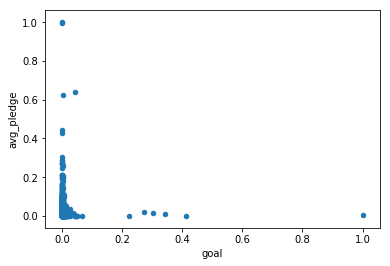

In [78]:
test_train_scl.plot.scatter(x="goal", y="avg_pledge")

In [65]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2]:
centroids = model.cluster_centers_
clusters = model.labels_

clusters

NameError: name 'model' is not defined

In [67]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters).map({
    0: "r",
    1: "g"
})
clusters.value_counts()

r    7052
g       6
dtype: int64

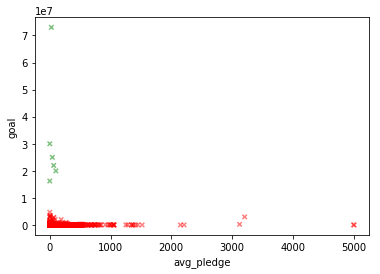

In [68]:
# Plot the data
x_train.plot.scatter(x="avg_pledge", y="goal", c=clusters, marker="x", alpha=.5)